In [1]:
import pandas as pd

# Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
For digitization, an industrial camera usually used for print inspection was used. 
The final images have 400x 400 pixels. 
[Wavelet Transform](https://en.wikipedia.org/wiki/Wavelet_transform) tool were used to extract features from images.

In [2]:
# load data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/BankNote_Authentication.csv'
banknote = pd.read_csv(url)
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Using physical attributes of banknotes, our goal is to classify them into forged (`class=1`) or original (`class=0`).

**Part 1:** We'll train a k-nearest neighbors model that predicts the `class` column

Define the feature matrix X and the target vector y from the wine dataframe, and then split X and y into training and testing sets.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>  <tt> class </tt> is a Python command, so the dot notation won't work. Use the bracket notation instead. </p>
</div>

In [3]:
from sklearn.model_selection import train_test_split

X = banknote.drop('class',axis=1)
y = banknote['class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Train a k-nearest neighbors model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

**Part 2:** We'll use accuracy and a confusion matrix to evaluate the performance of our model on the test set.

In [29]:
# import accuracy_score and confusion_matrix from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on the test set
y_pred = knn.predict(X_test)

In [30]:
# accuracy
print(accuracy_score(y_test,y_pred))

1.0


In [31]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[191   0]
 [  0 152]]


ValueError: n_features must be equal to 2. Got 4 instead.

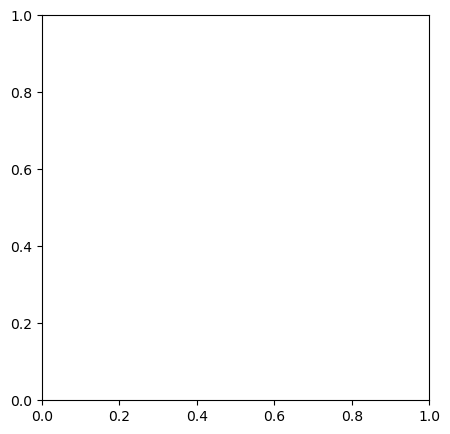

In [38]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# create a single plot
fig, ax = plt.subplots(figsize=(5, 5))

# plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    knn,
    X_train,
    response_method="predict",
    plot_method="pcolormesh",
    ax=ax,
    alpha=0.5,
    shading='auto'
)



plt.show()